<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/VNP/covid_impact_on_airport_traffic.csv')

In [ ]:
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [ ]:
data.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [ ]:
data['AggregationMethod'].value_counts()

Daily    7247
Name: AggregationMethod, dtype: int64

In [ ]:
data['Version'].value_counts()

1.0    7247
Name: Version, dtype: int64

In [ ]:
data['Country'].value_counts()

United States of America (the)    4441
Canada                            2311
Australia                          257
Chile                              238
Name: Country, dtype: int64

In [ ]:
# We can drop the columns "AggregationMethod" and "Version" since they don't affect the dataset in any way.
data = data.drop(['AggregationMethod','Version'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Country']=encoder.fit_transform(data['Country'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
encoder.classes_

array(['Australia', 'Canada', 'Chile', 'United States of America (the)'],
      dtype=object)

In [ ]:
data.head()

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."


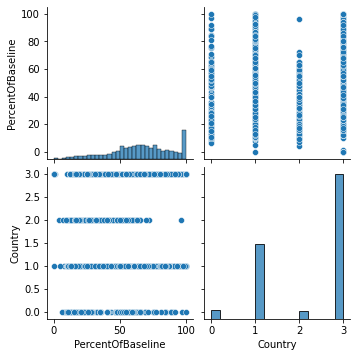

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [ ]:
dataCopy = data.copy()

In [ ]:
#Target column is the Country, that's what we're trying to predict based on PercentOfBaseline
#Since the target column has a categorical value, we use classification instead of regression
x = dataCopy['PercentOfBaseline']
y = dataCopy['Country']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train.to_numpy().reshape(-1,1))
X_test = ss.transform(X_test.to_numpy().reshape(-1,1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
     

KNeighborsClassifier()

In [ ]:
Y_pred = classifier.predict(X_test) 
Y_pred

array([3, 1, 3, ..., 1, 3, 3])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))
     

[[ 11  13   5  29]
 [  9 216   7 234]
 [ 12  10   2  27]
 [  9 171  24 671]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.27      0.19      0.22        58
           1       0.53      0.46      0.49       466
           2       0.05      0.04      0.04        51
           3       0.70      0.77      0.73       875

    accuracy                           0.62      1450
   macro avg       0.39      0.36      0.37      1450
weighted avg       0.60      0.62      0.61      1450



In [ ]:
print(f1_score(Y_test, Y_pred, average='micro'))

0.6206896551724138


In [ ]:
#DecisionTree model
y = dataCopy['Country']
x = dataCopy['PercentOfBaseline']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
X_train.to_numpy().reshape(-1,1)

array([[ 66],
       [ 84],
       [ 66],
       ...,
       [ 76],
       [100],
       [ 67]])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train.to_numpy().reshape(-1,1))
X_test = ss.transform(X_test.to_numpy().reshape(-1,1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15,min_samples_split=5,max_leaf_nodes=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=5, min_samples_split=5)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([3, 1, 3, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.47      0.35        55
           1       0.65      0.50      0.57       458
           2       0.00      0.00      0.00        42
           3       0.74      0.83      0.78       895

    accuracy                           0.69      1450
   macro avg       0.42      0.45      0.42      1450
weighted avg       0.67      0.69      0.67      1450



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.score(X_test,Y_test)

0.6875862068965517

In [ ]:
[str(i) for i in Y_train.unique()]

['3', '1', '2', '0']

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


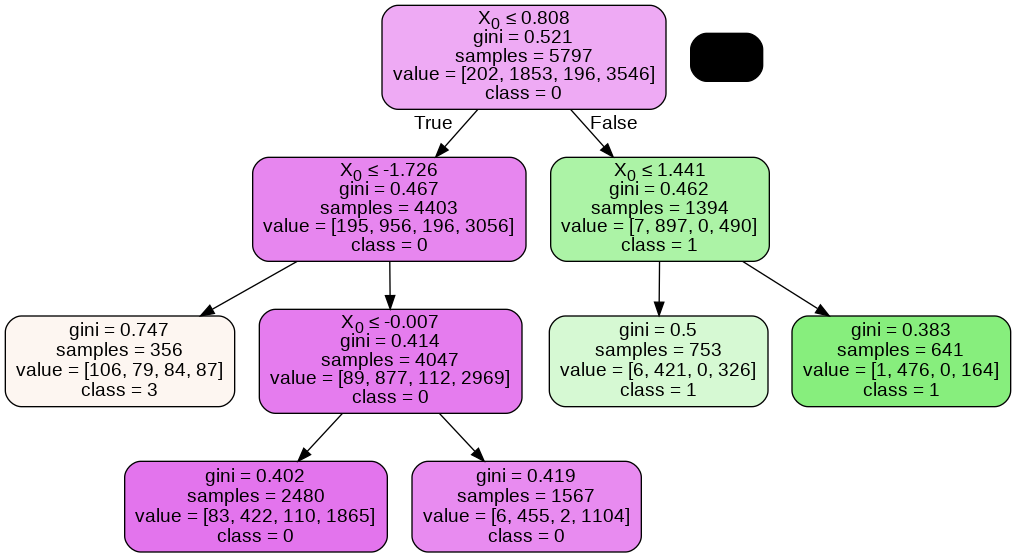

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=[str(i) for i in Y_train.unique()])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())